# Recuperatorio Seminario de Acualización

Leer archivo recuperatorio.xlsx que contiene mediciones promedios climatológicas de 1999 a 2020  de distintas estaciones y hallar:
+ Menor temperatura, estación y mes en que se registró.
+ Generar un DataFrame registros completos cuyos registro solo contengan humedad, precipitación y temperatura, no nula.
+ Comprobar si existen valores Nulos (NaN)
+ Realizar un gráfico comparando la humedad, temperatura y presimitación de 'LA PLATA AERO', 'NEUQUÉN AERO', 'MENDOZA AERO' y 'IGUAZÚ AERO' en 4 graficos integrados, uno por cada estación con las 3 mediciones, conservando la escala del eje y para todos los graficos.
    + Se deben diferenciar las lineas, marcadores y colores de cada serie y colocar una leyenda por cada grupo.
+ Realizar un grafico de cajas con 3 comparaciones de las tres mediciones entre las 4 estaciones.

In [1]:
import pandas as pd
import numpy as np

In [2]:
temp=pd.read_excel('./recuperatorio.xlsx')

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estación        784 non-null    object 
 1   Valor Medio de  784 non-null    object 
 2   Ene             711 non-null    float64
 3   Feb             708 non-null    float64
 4   Mar             715 non-null    float64
 5   Abr             717 non-null    float64
 6   May             718 non-null    float64
 7   Jun             717 non-null    float64
 8   Jul             699 non-null    float64
 9   Ago             706 non-null    float64
 10  Sep             716 non-null    float64
 11  Oct             716 non-null    float64
 12  Nov             715 non-null    float64
 13  Dic             717 non-null    float64
dtypes: float64(12), object(2)
memory usage: 85.9+ KB


In [4]:
temp.groupby('Valor Medio de').count()

,Estación,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
Valor Medio de,,,,,,,,,,,,,
Frecuencia de días con Precipitación superior a 1.0 mm,98,88,88,88,90,90,90,86,88,89,89,88,87
Humedad relativa (%),98,95,94,94,91,92,92,88,90,92,92,93,97
Nubosidad total (octavos),98,96,96,97,98,98,98,95,96,98,98,98,98
Precipitación (mm),98,88,88,88,90,90,90,86,88,89,89,88,87
Temperatura (°C),98,96,96,98,98,98,98,95,96,98,98,98,98
Temperatura máxima (°C),98,96,95,97,97,97,96,96,96,97,97,97,97
Temperatura mínima (°C),98,93,92,94,94,94,94,94,93,94,94,94,94
Velocidad del Viento (km/h) (2011-2020),98,59,59,59,59,59,59,59,59,59,59,59,59


In [5]:
min=temp[temp['Valor Medio de']=='Temperatura mínima (°C)']

In [6]:
min.min()[2:]

Ene    -6.1
Feb   -11.1
Mar   -16.5
Abr   -20.5
May   -21.6
Jun   -23.0
Jul   -25.0
Ago   -24.9
Sep   -22.8
Oct   -18.8
Nov   -11.5
Dic    -6.8
dtype: object

In [7]:
min[min['Jul']==-25]

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
754,BASE BELGRANO II,Temperatura mínima (°C),-6.1,-11.1,-16.5,-20.5,-21.6,-23.0,-25.0,-24.9,-22.8,-18.8,-11.5,-6.8


In [22]:
# Solo vlores de Humedad, Precipitación y Temperatura
ndf=temp[(temp['Valor Medio de']=='Humedad relativa (%)')|(temp['Valor Medio de']=='Precipitación (mm)')|(temp['Valor Medio de']=='Temperatura (°C)')]
# listo los registros que contengan null en alguna coumna
limpio=ndf[ndf.isnull().any(axis=1)]
# lista de estaciones con valores nulos
limpiar=limpio.groupby('Estación').count().index
# selecciono del listado todos los registros que no pertenezcan a la lista de estaciones con valores nulos.
lista=ndf[~ndf['Estación'].isin(limpiar)]
lista

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8
6,LA QUIACA OBSERVATORIO,Precipitación (mm),101.9,67.9,48.1,6.8,1.1,0.0,0.0,1.2,3.9,14.4,22.2,63.2
8,ORÁN AERO*,Temperatura (°C),26.4,25.4,23.9,21.3,18.1,15.6,14.9,17.6,21.0,24.5,25.5,26.4
11,ORÁN AERO*,Humedad relativa (%),76.5,79.3,82.8,84.3,83.6,81.0,73.8,63.3,55.7,61.1,66.7,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,RÍO GRANDE B.A.,Humedad relativa (%),74.3,76.4,80.3,84.0,87.5,89.1,88.6,86.3,82.3,76.5,73.5,73.4
726,RÍO GRANDE B.A.,Precipitación (mm),37.2,31.4,28.6,30.1,28.8,26.0,26.1,21.8,17.5,16.0,23.6,38.4
728,USHUAIA AERO*,Temperatura (°C),9.5,9.4,8.4,6.2,4.3,2.5,2.3,2.9,4.3,6.2,7.4,8.6
731,USHUAIA AERO*,Humedad relativa (%),71.1,73.0,74.2,77.1,78.5,81.0,79.5,77.0,74.5,70.1,70.7,70.8


In [9]:
lista.isna().any()

Estación          False
Valor Medio de    False
Ene               False
Feb               False
Mar               False
Abr               False
May               False
Jun               False
Jul               False
Ago               False
Sep               False
Oct               False
Nov               False
Dic               False
dtype: bool

In [10]:
import matplotlib.pyplot as plt

In [11]:
graf=lista[lista['Estación'].isin(['LA PLATA AERO', 'NEUQUÉN AERO', 'MENDOZA AERO', 'IGUAZÚ AERO'])]


In [12]:
lp=lista[lista['Estación']=='LA PLATA AERO'].set_index('Valor Medio de').copy()
lp.pop('Estación')

ig=lista[lista['Estación']=='IGUAZÚ AERO'].set_index('Valor Medio de').copy()
ig.pop('Estación')

mz=lista[lista['Estación']=='MENDOZA AERO'].set_index('Valor Medio de').copy()
mz.pop('Estación')

nq=lista[lista['Estación']=='NEUQUÉN AERO'].set_index('Valor Medio de').copy()
nq.pop('Estación')

Valor Medio de
Temperatura (°C)        NEUQUÉN AERO
Humedad relativa (%)    NEUQUÉN AERO
Precipitación (mm)      NEUQUÉN AERO
Name: Estación, dtype: object

In [13]:
lp.columns

Index(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct',
       'Nov', 'Dic'],
      dtype='object')

In [14]:
ig

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
Valor Medio de,,,,,,,,,,,,
Temperatura (°C),25.8,25.2,24.3,21.6,17.8,16.5,15.9,17.9,19.9,22.4,23.7,25.2
Humedad relativa (%),79.0,80.5,80.9,83.8,87.5,88.6,85.0,78.9,77.0,78.8,75.8,77.9
Precipitación (mm),180.1,149.9,153.3,161.1,185.5,145.5,107.0,83.7,155.3,247.0,172.3,219.0


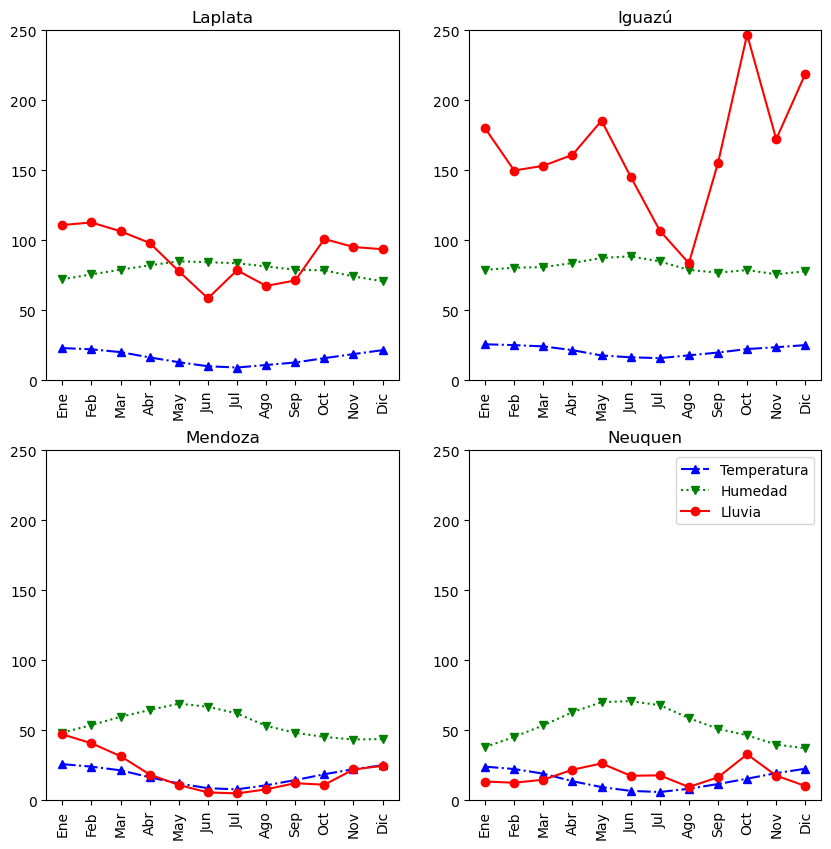

In [15]:
x=np.arange(len(lp.columns))
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(x,lp.iloc[0],'b^-.',x,lp.iloc[1],'gv:',x,lp.iloc[2],'ro-')
plt.ylim(0,250)
plt.xticks(x,lp.columns,rotation=90)
plt.title('Laplata')
plt.subplot(222)
plt.plot(x,ig.iloc[0],'b^-.',x,ig.iloc[1],'gv:',x,ig.iloc[2],'ro-')
plt.ylim(0,250)
plt.xticks(x,lp.columns,rotation=90)
plt.title('Iguazú')
plt.subplot(223)
plt.plot(x,mz.iloc[0],'b^-.',x,mz.iloc[1],'gv:',x,mz.iloc[2],'ro-')
plt.ylim(0,250)
plt.xticks(x,lp.columns,rotation=90)
plt.title('Mendoza')
plt.subplot(224)
plt.plot(x,nq.iloc[0],'b^-.',x,nq.iloc[1],'gv:',x,nq.iloc[2],'ro-')
plt.ylim(0,250)
plt.xticks(x,lp.columns,rotation=90)
plt.title('Neuquen')
plt.legend(['Temperatura','Humedad','Lluvia'])
plt.show()

In [16]:
h=graf[graf['Valor Medio de']=='Humedad relativa (%)'].set_index('Estación').copy()
h.pop('Valor Medio de')
t=graf[graf['Valor Medio de']=='Temperatura (°C)'].set_index('Estación').copy()
t.pop('Valor Medio de')
p=graf[graf['Valor Medio de']=='Precipitación (mm)'].set_index('Estación').copy()
p.pop('Valor Medio de')

Estación
IGUAZÚ AERO      Precipitación (mm)
MENDOZA AERO     Precipitación (mm)
LA PLATA AERO    Precipitación (mm)
NEUQUÉN AERO     Precipitación (mm)
Name: Valor Medio de, dtype: object

In [17]:
h

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
Estación,,,,,,,,,,,,
IGUAZÚ AERO,79.0,80.5,80.9,83.8,87.5,88.6,85.0,78.9,77.0,78.8,75.8,77.9
MENDOZA AERO,48.4,53.8,59.7,64.6,69.1,66.9,62.1,53.2,48.3,45.3,43.5,43.8
LA PLATA AERO,72.2,75.7,79.1,82.2,85.1,84.4,83.7,81.4,79.0,78.6,74.3,70.8
NEUQUÉN AERO,38.1,45.4,53.6,63.0,70.2,70.9,68.0,58.8,51.1,46.5,39.9,37.2


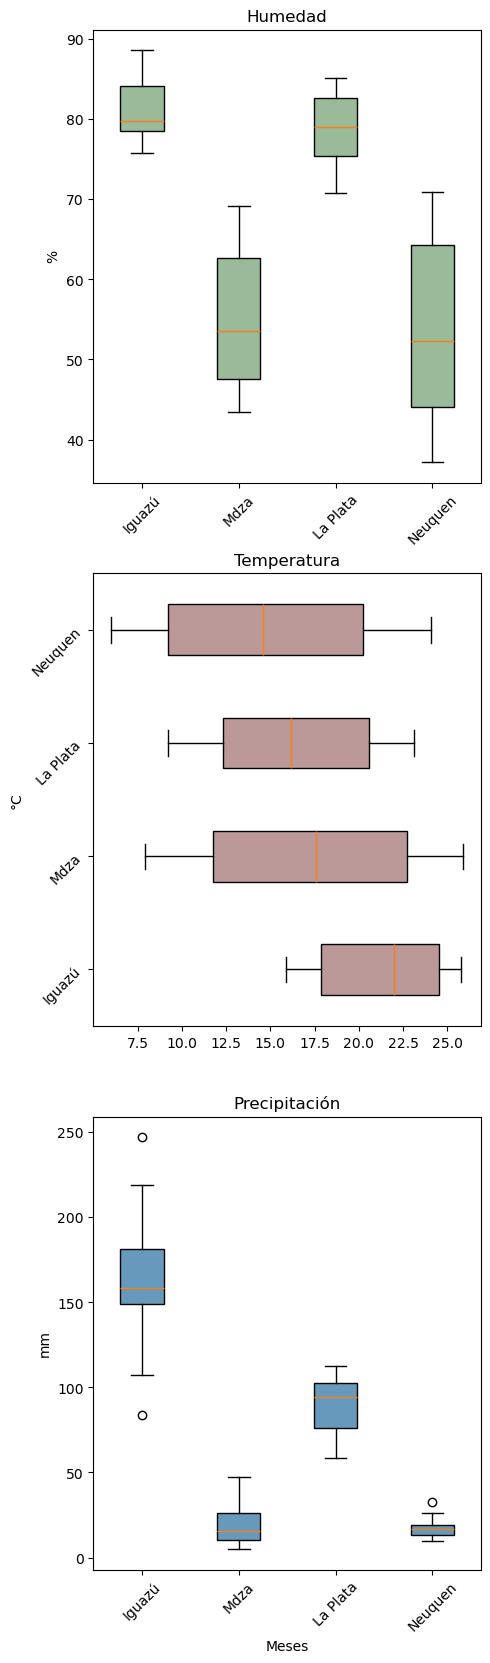

In [18]:
fig, ax=plt.subplots(3,1, figsize=(5,20))
ax[0].set_title('Humedad')
ax[0].set_ylabel('%')
ax[0].boxplot(h.T, patch_artist=True, boxprops = dict(facecolor = "#99bb99"))
ax[0].set_xticklabels(['Iguazú','Mdza','La Plata','Neuquen'], rotation=45)
ax[1].set_title('Temperatura')
ax[1].set_ylabel('°C')
ax[1].boxplot(t.T, vert=False, patch_artist=True, boxprops = dict(facecolor = "#bb9999"))
ax[1].set_yticklabels(['Iguazú','Mdza','La Plata','Neuquen'], rotation=45)
ax[2].set_title('Precipitación')
ax[2].set_ylabel('mm')
ax[2].boxplot(p.T, patch_artist=True, boxprops = dict(facecolor = "#6699bb"))
ax[2].set_xticklabels(['Iguazú','Mdza','La Plata','Neuquen'], rotation=45)
ax[2].set_xlabel('Meses')
plt.show()
